# Laboratorio 1 - Modelación y Simulación
Stefano Aragoni, Luis Santos


----------------

### Importar librerías


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import skew, kurtosis
from scipy.stats import uniform, chisquare, gamma
from scipy.special import erfinv
import scipy.interpolate as interpolate
from scipy import stats
from scipy.stats import norm

--------
### Ejercicio 1
Genere una muestra aleatoria de 1000 puntos de datos de una distribución normal con media 0 y desviación estándar 1.

Tasks:
1. Calcule e imprima la media, la varianza y la asimetría de la muestra.

In [52]:
x = np.random.normal(0, 1, 1000)

media = np.mean(x)
variance = np.var(x)
asymetry = skew(x)

# 1.1
print("Media:", media)
print("Varianza: ", variance)
print("Asimetría: ", asymetry)

Media: 0.06715867129054466
Varianza:  1.0183761764360784
Asimetría:  -0.01928413226748575


2. Trace un histograma de los datos y observe su forma.

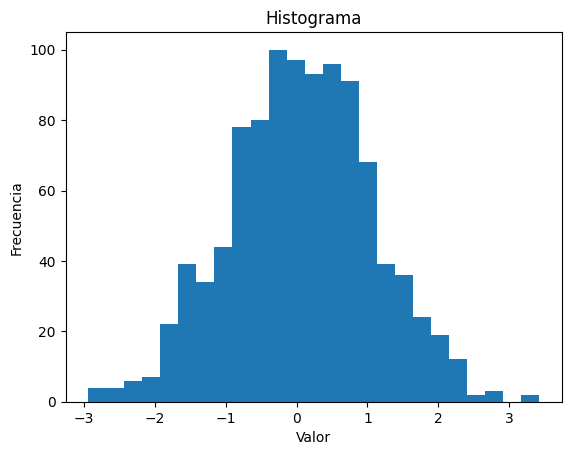

In [53]:
# 1.2
plt.hist(x, bins='auto')
plt.title("Histograma")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

3. ¿Qué le dicen estas estadísticas sobre la tendencia central, la dispersión y la forma de los datos?

A través de estas estadísticas, se puede comprobar que la distribución de los datos es normal. Esto debido a que la asimetría es cercana a 0, la varianza es cercana a 1 y la media es cercana a 0; valores que son característicos de una distribución normal.


Más específicamente, estas estadísticas nos dicen lo siguiente sobre la tendencia central, dispersión y forma de los datos:


- La media representa la tendencia central o valor promedio de una variable aleatoria; es decir que proporciona una indicación de la ubicación central de la distribución. En este caso, una media con valor 0 representa que la mayor cantidad de datos se encuentran en torno a este valor.

- La varianza, por otro lado, mide la dispersión o extensión de una distribución alrededor de su media. En este caso, la varianza cercana a 1 indica que los datos se encuentran relativamente cerca de la media, pero aún están dispersos al rededor de ella. Esto se confirma con el histograma, que demuestra como los datos están al rededor de la media, pero están dispersos en forma de campana.

- Finalmente, la asimetría es una medida de la asimetría de una distribución. En este caso, una asimetría cercana a 0 indica que los datos están relativamente simétricos al rededor de la media, lo cual se confirma con el histograma. Esto, junto con los datos anteriores, indica que los datos tienen una forma de campana, que es característica de una distribución normal.

--------
### Ejercicio 2
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución exponencial con parámetro de tasa 0.5.

Tasks:
1. Trace la función de densidad de probabilidad (PDF) y la función de distribución acumulativa (CDF) de los datos.

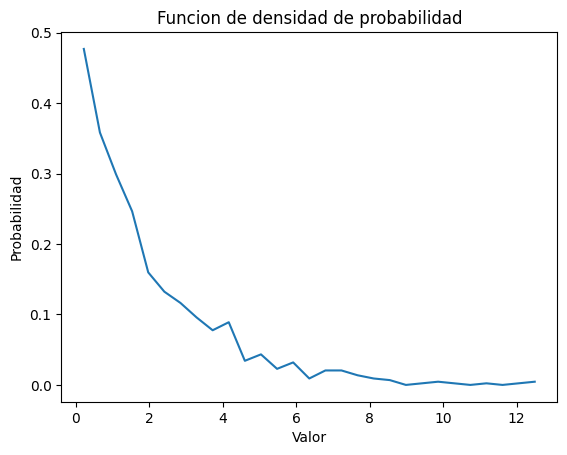

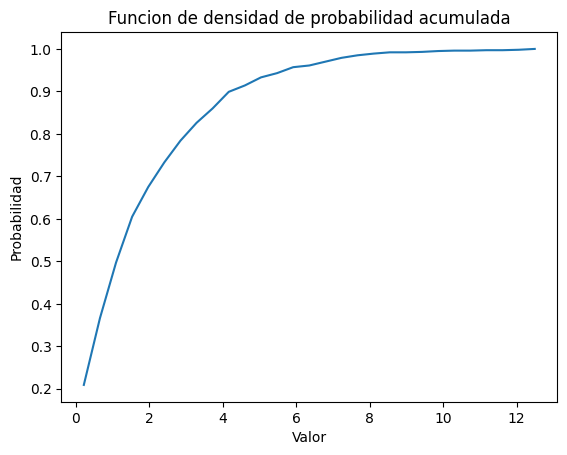

In [35]:
x = np.random.exponential(1/0.5, 1000)

#2.1
pdf, bins = np.histogram(x, bins='auto', density=True) # PDF -> Probability Density Function
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.plot(bin_centers, pdf)
plt.title("Funcion de densidad de probabilidad")
plt.xlabel("Valor")
plt.ylabel("Probabilidad")
plt.show()

cdf = np.cumsum(pdf) * np.diff(bins)[0] # CDF -> Cumulative Density Function
plt.plot(bin_centers, cdf)
plt.title("Funcion de densidad de probabilidad acumulada")
plt.xlabel("Valor")
plt.ylabel("Probabilidad")
plt.show()

2. Calcule e imprima las probabilidades para intervalos específicos utilizando la CDF. (por lo menos 2 intervalos a su elección)

In [36]:
#2.2
intervalo_1_prob = expon.cdf(2, scale=1/0.5) - expon.cdf(1, scale=1/0.5)
intervalo_2_prob = expon.cdf(2, scale=1/0.5) - expon.cdf(0, scale=1/0.5)

print("Probabilidad (CDF) para el intervalo [1, 2]:", intervalo_1_prob)
print("Probabilidad (CDF) para el intervalo [0, 2]:", intervalo_2_prob)

Probabilidad (CDF) para el intervalo [1, 2]: 0.2386512185411911
Probabilidad (CDF) para el intervalo [0, 2]: 0.6321205588285577


3. ¿Qué información puede obtener de la forma del PDF y el comportamiento de la CDF?

La Funcion de Densidad de Probabilidad (PDF) nos dice la probabilidad en un cierto rango dado, mientras que la Funcion de Distribución Acumulada (CDF) da la probabilidad de que una variable aleatoria sea menor o igual a un valor particular. 

Con esto en mente, de la forma del PDF se puede obtener lo siguiente:
- Distribución de probabilidad: En este caso, el PDF demuestra una distribución de probabilidad de los datos exponencial decreciente. Esto indica que los valores más pequeños son más probables que los valores más grandes.

Por otro lado, del comportamiento de la CDF se puede obtener lo siguiente:
- Acumulación de probabilidad: En este caso, el CDF demuestra la probabilidad acumulada. Esta función es exponencial creciente, ya que va acumulando la probabilidad de los datos vistos en el PDF. 
- Sin embargo, el comportamiento del CDF indica que los valores más pequeños causan que la probabilidad acumulada aumente en mayores cantidades. Sin embargo, valores más grandes no "aportan mucho" a dicha probabilidad acumulada, por lo cual crece de manera más lenta en estos puntos. 

Cabe destacar que el CDF está relacionado con el PDF, ya que la derivada del CDF da el PDF


----------
### Ejercicio 3
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución beta con parámetros de forma (2, 2).

Tasks:
1. Calcule e imprima el sesgo y la curtosis de la muestra.

Sesgo (Manual):  0.04418600753452258
Sesgo (Scipy):  0.04418600753452258

Curtosis (Manual):  -0.9199854492136041
Curtosis (Scipy):  -0.9199854492136041


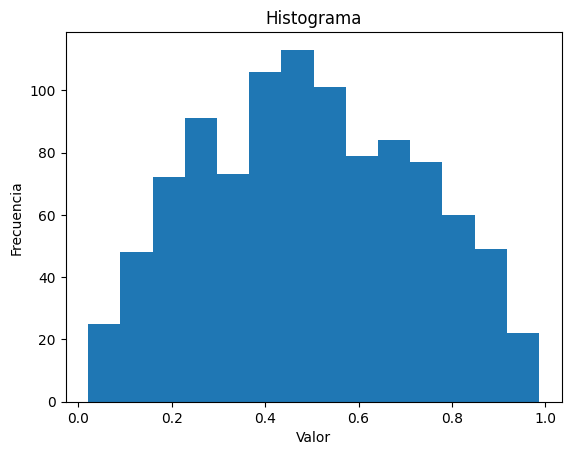

In [55]:
x = np.random.beta(2, 2, 1000)

#3.1
sesgo = np.mean((x - np.mean(x))**3) / np.var(x)**(3/2)
curtosis = np.mean((x - np.mean(x))**4) / np.var(x)**2 - 3

print("Sesgo (Manual): ", sesgo)
print("Sesgo (Scipy): ", skew(x))

print("\nCurtosis (Manual): ", curtosis)
print("Curtosis (Scipy): ", kurtosis(x))

# Grafico de la distribucion
plt.hist(x, bins='auto')
plt.title("Histograma")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

2. Analice las implicaciones del sesgo y la curtosis en la forma y las características de la distribución.

El sesgo es una medida de la asimetría de una distribución; donde la asimetría positiva indica una cola más larga a la derecha, mientras que la asimetría negativa indica una cola más larga a la izquierda. 

Por otro lado, la curtosis es una medida que mide la pesadez de las colas en comparación con la distribución normal; donde la curtosis positiva indica colas más pesadas, mientras que las negativas indican más ligeras.


En este caso, se puede concluir lo siguiente sobre la forma y características de la distribución:
- El sesgo cercano a 0 indica que la distribución es casi simétrica, ya que la cola a la derecha es casi igual a la cola a la izquierda.
- La curtosis cercana a -1 indica que la distribución tiene colas más ligeras, por lo cual el histograma se ve más "plano" en los extremos.

En conclusión, se puede decir que la distribución es casi simétrica y platicúrtica.

--------
### Ejercicio 4
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución de Poisson con parámetro lambda 5.

Tasks:
1. Trace un histograma de los datos generados.

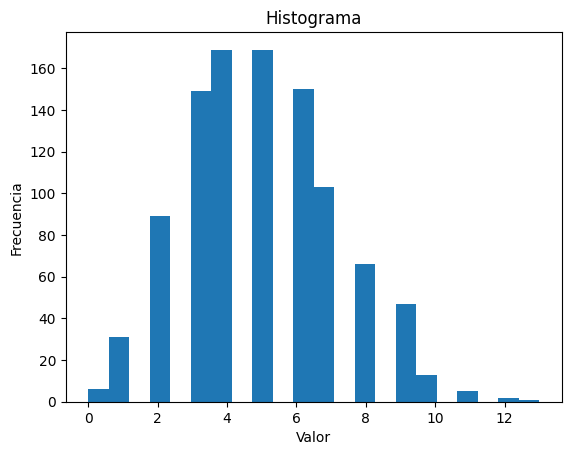

In [60]:
x = np.random.poisson(5, 1000)

#4.1
plt.hist(x, bins='auto')
plt.title("Histograma")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()

2. Calcule e imprima la media y la varianza de la muestra.

In [61]:
#4.2
mean = np.mean(x)
variance = np.var(x)

print("Media: ", mean)
print("Varianza: ", variance)

Media:  4.971
Varianza:  4.786159


3. ¿Puedes observar algún patrón o tendencia en los datos generados a partir de la distribución de Poisson?

En este caso, se puede observar que el valor de lambda es casi igual a la media y varianza de los datos. Esto se comprueba en el histograma, donde se puede visualizar que la mayor cantidad de datos se encuentran en torno a este valor. 

Esto indica que los datos más cercanos a lamda son más probables que los datos más alejados de este valor.


---------
### Ejercicio 5
Muestree 500 puntos de datos de una distribución normal utilizando el método de transformación inversa.

Referencias:
- How to do inverse transformation sampling in scipy and numpy:
https://tmramalho.github.io/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/ 
- Codigo de Alberto: https://colab.research.google.com/drive/1YCtrIrKIU0IN8Krp61qLNxUq_xukQ485?usp=sharing


Tasks:
1. Trace un histograma de los datos generados.

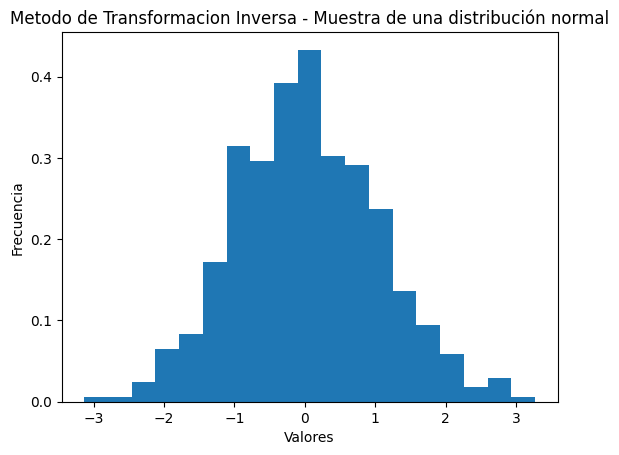

In [49]:
u = np.random.uniform(0, 1, 500)

# aplicar metodo de transformación inversa para obtener una muestra de una distribución normal
x = 0 + 1 * np.sqrt(2) * erfinv(2 * u - 1) 

#5.1
plt.hist(x, bins='auto', density=True)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Metodo de Transformacion Inversa - Muestra de una distribución normal')
plt.show()


2. Compare el histograma con la PDF teórica de la distribución normal.

En este caso, según la gráfica generada ”Histograma vs. PDF teórica de una distribución normal”, el 
histograma presenta una forma similar al de la PDF teórica. Ambos gráficos cuentan con características de distribuciones
normales. 

Más específicamente, se puede observar cómo la mayoría del histograma se encuentra contenido dentro
de la curva roja indicativa de la PDF teórica. 

Finalmnete, se podría decir que el PDF representa la forma de la distribución normal experimentalmente obtenida..

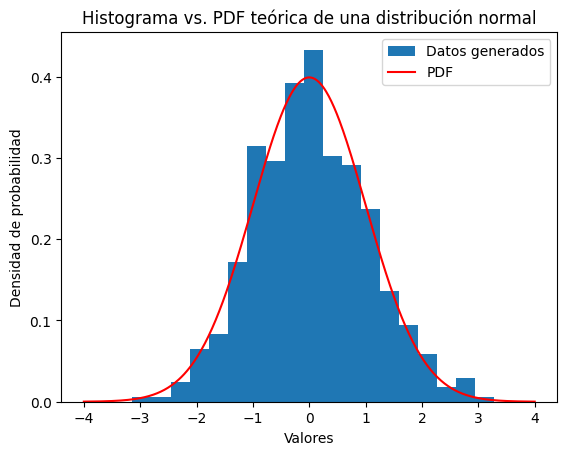

In [50]:
#5.2
plt.hist(x, bins='auto', density=True, label='Datos generados')

pdf_teorico = norm.pdf(np.linspace(-4, 4, 500) , loc=0, scale=1)  # PDF teórica de una distribución normal
plt.plot(np.linspace(-4, 4, 500), pdf_teorico, 'r', label='PDF')

plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma vs. PDF teórica de una distribución normal')
plt.legend()
plt.show()


3. ¿La muestra generada representa con precisión la distribución normal subyacente?

Específicamente, la muestra generada representa con precisión la distribución normal subyacente ya que esta muestra una forma de campana, la cual es característica
de una distribución normal. Adicionalmente, la muestra generada presenta una media de 0 y una varianza de 1, así como una asimetría y curtosis cercanas a 0, lo cual es característico de una distribución normal.

Finalmente, el histograma generado presenta una forma similar a la de la PDF teórica de una distribución normal.

In [51]:
# Media, varianza, sesgo y curtosis
print("Media: ", np.mean(x))
print("Varianza: ", np.var(x))
print("Sesgo: ", skew(x))
print("Curtosis: ", kurtosis(x))

Media:  0.03641214551716125
Varianza:  1.0286769907122766
Sesgo:  0.17107524869965668
Curtosis:  0.012227615708880535


---------
### Ejercicio 6
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución gamma con parámetro de forma 2 y parámetro de escala 3.

Tasks:
1. Utilice MLE para estimar los parámetros de forma y escala de la distribución gamma de la muestra.

In [99]:
x = np.random.gamma(2, 3, 1000)

#6.1
estimated_shape, _, estimated_scale = stats.gamma.fit(x, floc=0)  # stats.gamma.fit -> Maximum Likelihood Estimation
print("Forma estimada:", estimated_shape)
print("Escala estimada:", estimated_scale)

error_shape = abs((2 - estimated_shape) / 2) * 100
error_scale = abs((3 - estimated_scale) / 3) * 100
print("\nError de forma:", error_shape, "%")
print("Error de escala:", error_scale, "%")

Forma estimada: 2.013308368008981
Escala estimada: 2.9819960444638935

Error de forma: 0.6654184004490471 %
Error de escala: 0.6001318512035485 %


2. ¿Qué tan cerca están los parámetros estimados de los parámetros verdaderos?

Los parámetros estimados se encuentran muy cerca de los parámetros verdaderos, ya que el error de forma es de 0.66% y el error de escala es de 0.60%. 
Esto considerando que la forma verdadera es 2 y la escala verdadera es 3, y experimentalmente se obtuvo una forma estimada de 2.01 y una escala estimada de 2.98.

Dichos resultados son indicativos de que MLE es un método para estimación de parámetros muy exacto.

# 3. ¿Puede evaluar la bondad de ajuste de la distribución estimada a los datos observados?

En este caso, se confirmó que sí se puede evaluar la bondad de ajuste de la distribución estimada a los datos observados a través de la prueba chi cuadrado.

- Más específicamente, esta prueba regresó un valor de Chi-Squared de 0.76. Este valor, mientras más bajo, reafirma que la distribución estimada se ajusta a los datos observados. En otras palabras, se confirma nuevamente que la distribución estimada es muy cercana a la distribución real.

- Por otro lado, también se encontró el valor de P de 0.99999. Este valor indica, nuevamente, que la distribución estimada se ajusta a los datos observados.

In [212]:
teorico = stats.gamma(2, 0, 3)

muestra_hist, muestra_bins = np.histogram(x, bins='auto', density=True)
teorico_hist = teorico.pdf(muestra_bins[:-1]) * np.diff(muestra_bins)

muestra_hist = muestra_hist / np.sum(muestra_hist)
teorico_hist = teorico_hist / np.sum(teorico_hist)

# Prueba de chi cuadrado
chi, p = chisquare(muestra_hist, teorico_hist)
print("\nChi Cuadrado:", chi)
print("P-valor:", p)


Chi Cuadrado: 0.7604905217981659
P-valor: 0.9999999999999996


---------
### Ejercicio 7
Genere una muestra aleatoria de 1000 puntos de datos a partir de una distribución normal bivariada con vector medio [0, 0] y matriz de covarianza [[1, 0,5], [0,5, 1]].

Tasks:
1. Visualice los puntos de datos en un diagrama de dispersión.


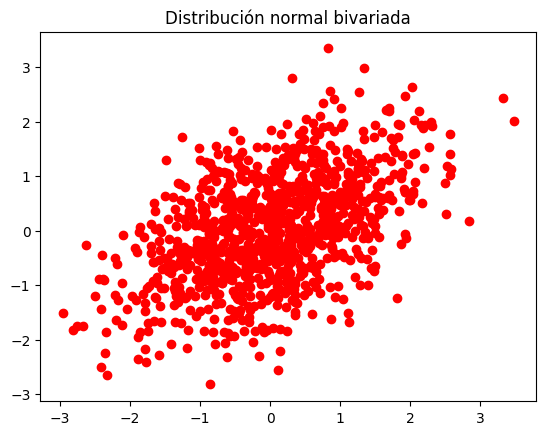

In [44]:
vector_medio = [0, 0]
matriz_cov = [[1, 0.5], [0.5, 1]]

dist_biv = np.random.multivariate_normal(vector_medio, matriz_cov, 1000).T

#7.1
plt.scatter(dist_biv[0], dist_biv[1], c='r', marker='o')
plt.title('Distribución normal bivariada')
plt.show()

2. Calcula e imprime el coeficiente de correlación entre las dos variables.


In [45]:
#7.2
correlation_coefficient = np.corrcoef(dist_biv[0], dist_biv[1])[0, 1]
print("Coeficiente de correlación:", correlation_coefficient)

Coeficiente de correlación: 0.5026783588336782


3. ¿Qué información puede obtener sobre la relación entre las variables del diagrama de dispersión y el coeficiente de correlación?

En este caso, en el diagrama se puede observar como los puntos siguen una relación (moderada) lineal positiva; los datos se encuentran en una línea diagonal que va de la esquina inferior izquierda a la esquina superior derecha. Sin embargo, hay algunos datos que se alejan de esta línea (dispersos), lo cual indica que la relación no es 100% fuerte. 

Esta conclusión se puede confirmar con el coeficiente de correlación, ya que este indica que la relación entre las variables es positiva, pero no totalmente directa. Cabe destacar que este coeficiente va de -1 (relacion inversa) a 1 (relacion directa), por lo cual 0.5 indica una relación positiva, pero totalmente directa. Por otro lado, 0 indicaría una falta de relación. 

En conclusión, en base al coeficiente de correlación y las variables del diagrama, se puede decir qque existe una relación moderada positiva entre las variables.

---------
### Ejercicio 8
Investigue en qué consiste la prueba “Goodness-of-Fit”. Luego, genere una muestra aleatoria de 500 puntos de datos a partir de una distribución uniforme entre 0 y 1.

Referencia: How to Perform a Chi-Square Goodness of Fit Test in Python - https://www.geeksforgeeks.org/how-to-perform-a-chi-square-goodness-of-fit-test-in-python/

Tasks:
1. Realice una prueba de bondad de ajuste de chi-cuadrado para evaluar si la muestra sigue una distribución uniforme.

In [209]:
muestra = np.random.uniform(0, 1, 500)  # muestra de una distribución uniforme [0, 1]
teorico = uniform(loc=0, scale=1)       # distribución teórica

muestra_hist, _ = np.histogram(muestra, bins='auto')
teorico_hist = teorico.pdf(np.linspace(0, 1, 10)) * 50

muestra_hist = muestra_hist / np.sum(muestra_hist)
teorico_hist = teorico_hist / np.sum(teorico_hist)

#8.1
chi, p = chisquare(muestra_hist, teorico_hist)
print("\nChi Cuadrado:", chi)
print("P-valor:", p)


Chi Cuadrado: 0.023039999999999998
P-valor: 0.9999999999642244


2. Interprete el resultado de la prueba y saque conclusiones sobre el ajuste de los datos.

En este caso, se puede concluir que la muestra sigue una distribución uniforme, ya que el valor de Chi-Squared es de 0.023. Este valor, mientras más bajo, reafirma que la diferencia entre la distribución observada y la distribución uniforme es pequeña. En otras palabras, indica que la muestra es muy cercana a la distribución uniforme.

Por otro lado, también se encontró el valor de P de 0.99999. Debido a que este valor es mayor a 0.05, no se puede rechazar la hipótesis nula ('la muestra sigue una distribución uniforme'). Por tal razón, se puede concluir que no hay suficiente evidencia para rechazar la hipótesis nula.


Finalmente, se puede concluir que la muestra se ajusta muy cercanamente a una distribución uniforme.

3. ¿Puede sugerir alguna modificación para mejorar la bondad de ajuste?

En este caso, se podría sugerir aumentar la cantidad de frecuencias. Esto debido a que, mientras más frecuencias, más se puede comprobar que la muestra sigue una distribución uniforme. En el caso de Chi Cuadrado, esto es sumamente importante debido a que esta prueba analiza específicamente las frecuencias en sí.

Otra modificación (que podría ir de la mano con la anterior) podría ser aumentar la cantidad de elementos en la muestra aleatoria. Esto debido a que así se peuden tener más datos para analizar en la respectiva prueba y así tener más certeza de los resultados de la misma. 

Referencia: https://www.famaf.unc.edu.ar/~kisbye/mys/clase16_pr.pdf (Técnicas de validación estadística Bondad de ajuste)